In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
# from datetime import datetime

In [2]:
symb = input('Enter symbol : ') + '.ns'

Enter symbol : sbin


In [5]:
days = 50

In [6]:
if days<=20:
    period = input('Enter period : \n Valid periods:1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max : ')
elif days>22:
    period = input('Enter period : \n Valid periods:3mo,3mo,6mo,1y,2y,5y,10y,ytd,max : ')
    

Enter period : 
 Valid periods:3mo,3mo,6mo,1y,2y,5y,10y,ytd,max : 3mo


In [7]:
def calculate_sma(data, window):
    sma = []
    for i in range(len(data) - window + 1):
        window_data = data[i : i + window]
        sma_value = sum(window_data) / window
        sma.append(sma_value)
    padding = [0] * (window -1) 
    new_row = padding + sma
    return new_row


In [8]:
data = yf.download(symb,period='max')
data[str(days)+' SMA'] = calculate_sma(data['Close'], days)

[*********************100%***********************]  1 of 1 completed


In [9]:
days_to_show = int(input('For last how many days you want to plot graph ? : '))

For last how many days you want to plot graph ? : 100


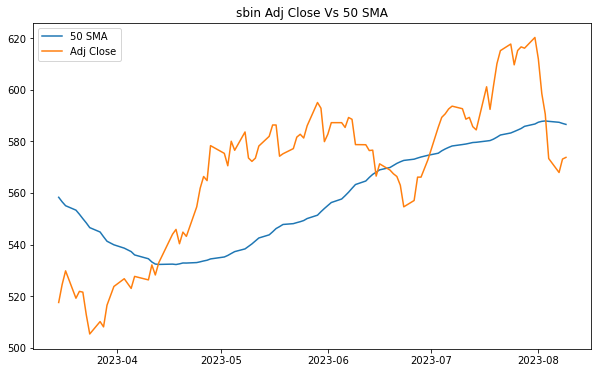

In [10]:
plt.figure(figsize=(10,6))
plt.plot(data[str(days)+' SMA'][-days_to_show:],label=str(days)+' SMA')
plt.plot(data['Close'][-days_to_show:],label='Adj Close')
plt.legend()
plt.title(symb.split('.')[0] + ' Adj Close Vs ' + str(days)+' SMA')
# plt.xticks(data.index[-days_to_show:],rotation=90)

plt.show()

In [11]:
l = []
smadf = pd.DataFrame()
flag = 0
row_index = 0
for i in data.index:
    if flag==0:
        if data['Close'][i] >= data[str(days)+' SMA'][i]:
#         if data[str(days)+' SMA'][i] >= data['Adj Close'][i]:
            l.append(i)
            
            smadf.loc[row_index,'flag'] = flag
            smadf.loc[row_index,'date'] = i
            smadf.loc[row_index,'Close'] = data['Close'][i]
            smadf.loc[row_index,'SMA'] = data[str(days)+' SMA'][i]
            row_index += 1
            
            flag=1
            
    elif flag==1:
        if data['Close'][i] <= data[str(days)+' SMA'][i]:
#         if data[str(days)+' SMA'][i] <= data['Adj Close'][i]:
            l.append(i)
            
            smadf.loc[row_index,'flag'] = flag
            smadf.loc[row_index,'date'] = i
            smadf.loc[row_index,'Close'] = data['Close'][i]
            smadf.loc[row_index,'SMA'] = data[str(days)+' SMA'][i]
            row_index += 1
            
            flag=0
        
# l = list(set(l))
# l.sort(reverse=False)
# l

smadf

,flag,date,Close,SMA
0,0.0,1996-01-01,18.823240,0.000000
1,1.0,1996-03-19,21.012209,21.119015
2,0.0,1996-03-21,21.677391,21.272809
3,1.0,1996-03-26,21.417923,21.481610
4,0.0,1996-03-27,21.814201,21.567471
...,...,...,...,...
449,1.0,2023-06-15,566.500000,568.025000
450,0.0,2023-06-16,571.250000,568.915000
451,1.0,2023-06-19,568.849976,569.832000
452,0.0,2023-07-03,585.450012,575.365999


In [380]:
# data.loc['2023-07-03' : '2023-08-04']

In [381]:
max(data.loc['2023-07-03' : '2023-08-04']['Close'])

2841.85009765625

In [382]:
(max(data.loc['2023-07-03' : '2023-08-04']['Close']) -  data.loc['2023-07-03']['Close'] ) /data.loc['2023-07-03']['Close'] * 100

8.645874936192746

In [383]:
# smadf.loc[smadf['flag']==0]

In [384]:
# smadf.loc[smadf['flag']==1]

In [385]:
# indexDates = pd.DataFrame()
# start = smadf.loc[smadf['flag']==0,'date']#['date']
# end = smadf.loc[smadf['flag']==1,'date'] #['date']
# indexDates['start'] = start
# # index.reset_index()
# indexDates['end'] = end#.reset_index(drop=True)

In [386]:
# # for i in zip(start,end):
# #     print(i)
# print(len(indexDates))
# print(len(start))
# print(len(end))
# indexDates

In [387]:
# start,end

In [12]:
# indexDates = pd.DataFrame()
start = smadf.loc[smadf['flag']==0]['date']
end = smadf.loc[smadf['flag']==1]['date']
indexDates = pd.DataFrame({ 'start' : start.reset_index(drop=True), 'end' :  end.reset_index(drop=True)})

In [13]:
indexDates.tail(2)

,start,end
225,2023-06-16,2023-06-19
226,2023-07-03,2023-08-04


In [14]:
smadf.tail(2)

,flag,date,Close,SMA
452,0.0,2023-07-03,585.450012,575.365999
453,1.0,2023-08-04,573.299988,587.706996


In [15]:
data.loc['2023-06-16' : '2023-06-19']

,Open,High,Low,Close,Adj Close,Volume,50 SMA
Date,,,,,,,
2023-06-16,568.75,574.700012,567.049988,571.250000,571.250000,12660226,568.915
2023-06-19,571.25,572.750000,565.900024,568.849976,568.849976,17903691,569.832


In [16]:
type(data.index[0])

pandas._libs.tslibs.timestamps.Timestamp

In [17]:
type(indexDates['start'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [18]:
data.loc[indexDates['start'][0] : indexDates['end'][0]].head(2)

,Open,High,Low,Close,Adj Close,Volume,50 SMA
Date,,,,,,,
1996-01-01,18.691147,18.978922,18.540184,18.823240,12.409935,43733533,0.0
1996-01-02,18.894005,18.964767,17.738192,18.224106,12.014933,56167280,0.0


In [19]:
finaldf = indexDates.copy()

In [20]:
finaldf.tail(2)

,start,end
225,2023-06-16,2023-06-19
226,2023-07-03,2023-08-04


In [21]:
for i in range(len(indexDates)):
    per = (max(data.loc[indexDates['start'][i] : indexDates['end'][i],'Close']) - data.loc[indexDates['start'][i],'Close'] )/ data.loc[indexDates['start'][i],'Close']*100
    finaldf.loc[i,'max price between the start and end dates'] = max(data.loc[indexDates['start'][i] : indexDates['end'][i],'Close'])
    finaldf.loc[i,'percentage'] = per
    finaldf.loc[i,'max price date'] = data.loc[data['Close']==max(data.loc[indexDates['start'][i] : indexDates['end'][i],'Close'])].index[0]

In [22]:
finaldf

,start,end,max price between the start and end dates,percentage,max price date
0,1996-01-01,1996-03-19,24.139980,28.245615,1996-02-09
1,1996-03-21,1996-03-26,21.677391,0.000000,1996-03-21
2,1996-03-27,1996-05-23,30.065290,37.824392,1996-04-24
3,1996-05-24,1996-05-27,25.522238,0.000000,1996-05-24
4,1996-05-29,1996-05-30,26.012869,0.000000,1996-05-29
...,...,...,...,...,...
222,2022-12-26,2023-01-06,613.700012,2.780110,2022-12-30
223,2023-01-09,2023-01-10,607.700012,0.000000,2023-01-09
224,2023-04-13,2023-06-15,595.000000,11.642741,2023-05-29
225,2023-06-16,2023-06-19,571.250000,0.000000,2023-06-16


In [23]:
fc = finaldf.copy()

In [24]:
fc.loc[fc['percentage']!=0]

,start,end,max price between the start and end dates,percentage,max price date
0,1996-01-01,1996-03-19,24.139980,28.245615,1996-02-09
2,1996-03-27,1996-05-23,30.065290,37.824392,1996-04-24
5,1996-05-31,1996-07-24,30.423828,16.198194,1996-07-18
8,1996-12-18,1997-03-31,30.900307,49.032995,1997-03-05
9,1997-04-17,1997-05-13,30.296453,8.150896,1997-04-30
...,...,...,...,...,...
219,2022-07-01,2022-09-28,574.049988,22.962403,2022-09-20
221,2022-10-17,2022-12-23,625.500000,15.055637,2022-12-14
222,2022-12-26,2023-01-06,613.700012,2.780110,2022-12-30
224,2023-04-13,2023-06-15,595.000000,11.642741,2023-05-29


In [25]:
fc.loc[fc['percentage']!=0]['percentage'].describe()

count    135.000000
mean      14.441633
std       18.442170
min        0.019349
25%        1.861690
50%        7.167350
75%       18.996830
max      102.783889
Name: percentage, dtype: float64

In [26]:
fc.loc[fc['percentage']==fc['percentage'].max()]

,start,end,max price between the start and end dates,percentage,max price date
208,2020-11-03,2021-03-24,415.200012,102.783889,2021-02-18


In [27]:
per = list(fc.loc[fc['percentage']!=0]['percentage'])
bins = [0,20,40,60,80,100,float('inf')]

# Use the cut() function to categorize numbers into bins
categories = pd.cut(per, bins=bins, labels=['0-20', '20-40', '40-60', '60-80', '80-100','100 +'])

# Use value_counts() to count the numbers within each category
count_by_category = categories.value_counts().sort_index()

# Print the counts
print(count_by_category)


0-20      105
20-40      16
40-60       8
60-80       5
80-100      0
100 +       1
dtype: int64


In [28]:
fc.loc[fc['percentage']>60]

,start,end,max price between the start and end dates,percentage,max price date
65,2003-05-05,2003-09-18,42.953785,60.780505,2003-08-27
98,2006-07-28,2007-01-08,128.568863,71.101203,2006-12-01
99,2007-04-18,2007-08-17,161.044861,65.064557,2007-08-08
115,2009-03-31,2009-07-08,190.690002,78.699282,2009-06-02
148,2014-03-07,2014-07-11,275.350006,66.914201,2014-05-23
208,2020-11-03,2021-03-24,415.200012,102.783889,2021-02-18


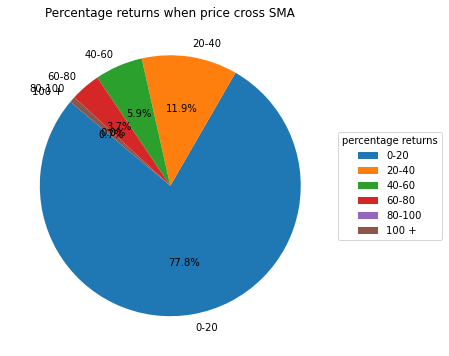

In [29]:
# Plot a pie chart
plt.figure(figsize=(8, 6))
plt.pie(count_by_category, labels=count_by_category.index, autopct='%1.1f%%', startangle=140)
plt.title("Percentage returns when price cross SMA")

plt.legend(title='percentage returns', labels=count_by_category.index, bbox_to_anchor=(1, 0.5), loc='center left')

plt.show()

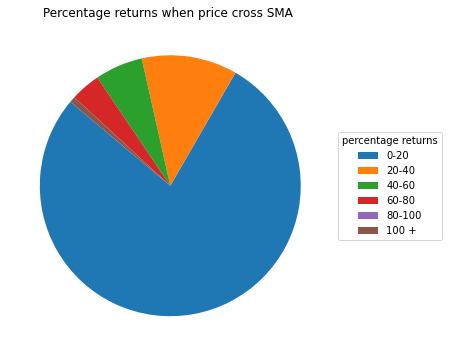

In [30]:
# Plot a pie chart
plt.figure(figsize=(8, 6))
plt.pie(count_by_category,  startangle=140)
plt.title("Percentage returns when price cross SMA ")

plt.legend(title='percentage returns', labels=count_by_category.index, bbox_to_anchor=(1, 0.5), loc='center left')

plt.show()

In [338]:
import pandas as pd

# Sample list of numbers
numbers = [5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

# Define your custom bin edges (ranges)
bins = [0, 20, 40, 60, 80, 100]

# Use the cut() function to categorize numbers into bins
categories = pd.cut(numbers, bins=bins, labels=['0-20', '20-40', '40-60', '60-80', '80-100'])

# Use value_counts() to count the numbers within each category
count_by_category = categories.value_counts().sort_index()

# Create a DataFrame to display the results
result_df = pd.DataFrame({'Number': numbers, 'Category': categories})

# Print the result
print(result_df)


   Number Category
0       5     0-20
1      15     0-20
2      25    20-40
3      35    20-40
4      45    40-60
5      55    40-60
6      65    60-80
7      75    60-80
8      85   80-100
9      95   80-100


In [337]:
import pandas as pd

# Sample list of numbers
numbers = [5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

# Define your custom bin edges (ranges)
bins = [0, 20, 40, 60, 80, 100]

# Use the cut() function to categorize numbers into bins
categories = pd.cut(numbers, bins=bins, labels=['0-20', '20-40', '40-60', '60-80', '80-100'])

# Use value_counts() to count the numbers within each category
count_by_category = categories.value_counts().sort_index()

# Print the counts
print(count_by_category)


0-20      2
20-40     2
40-60     2
60-80     2
80-100    2
dtype: int64
